In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Data Preparation
# Aggregating transaction data for each customer
transactions_summary = transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',         # Total quantity purchased
    'TotalValue': 'sum',       # Total transaction value
    'TransactionID': 'count'   # Number of transactions
}).rename(columns={
    'Quantity': 'TotalQuantity',
    'TotalValue': 'TotalSpend',
    'TransactionID': 'TransactionCount'
}).reset_index()

In [4]:
# Merge customer and transaction data
merged_data = pd.merge(customers, transactions_summary, on="CustomerID", how="inner")

In [5]:
# Drop irrelevant columns (e.g., CustomerName, Region, SignupDate)
merged_data = merged_data.drop(columns=["CustomerName", "Region", "SignupDate"])

In [6]:
# Handle missing values
merged_data.fillna(0, inplace=True)

In [7]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data.iloc[:, 1:])

In [8]:
# Clustering
# Choose the optimal number of clusters (2-10) using the Davies-Bouldin Index
db_indices = []
silhouette_scores = []
k_values = list(range(2, 11))

In [9]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

    db_index = davies_bouldin_score(scaled_features, cluster_labels)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)

    db_indices.append(db_index)
    silhouette_scores.append(silhouette_avg)

Text(0, 0.5, 'DB Index')

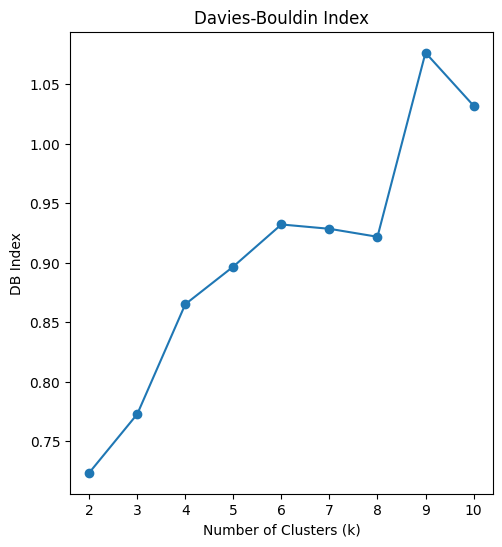

In [10]:
# Visualize DB Index and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, db_indices, marker='o')
plt.title("Davies-Bouldin Index")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DB Index")

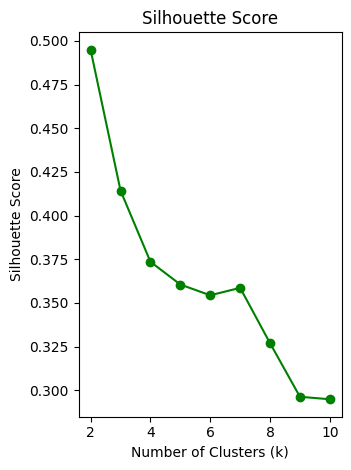

In [11]:
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

In [12]:
# Select the best number of clusters (k) based on the lowest DB Index
optimal_k = k_values[np.argmin(db_indices)]
print(f"Optimal number of clusters (k): {optimal_k}")

Optimal number of clusters (k): 2


In [13]:
# Final clustering with optimal_k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_cluster_labels = final_kmeans.fit_predict(scaled_features)

In [14]:
# Add cluster labels to the original data
merged_data['Cluster'] = final_cluster_labels

In [15]:
# Cluster Metrics
db_index_final = davies_bouldin_score(scaled_features, final_cluster_labels)
silhouette_final = silhouette_score(scaled_features, final_cluster_labels)


In [16]:
print(f"Davies-Bouldin Index for final clusters: {db_index_final}")
print(f"Silhouette Score for final clusters: {silhouette_final}")

Davies-Bouldin Index for final clusters: 0.7233652695141874
Silhouette Score for final clusters: 0.49487297008885417


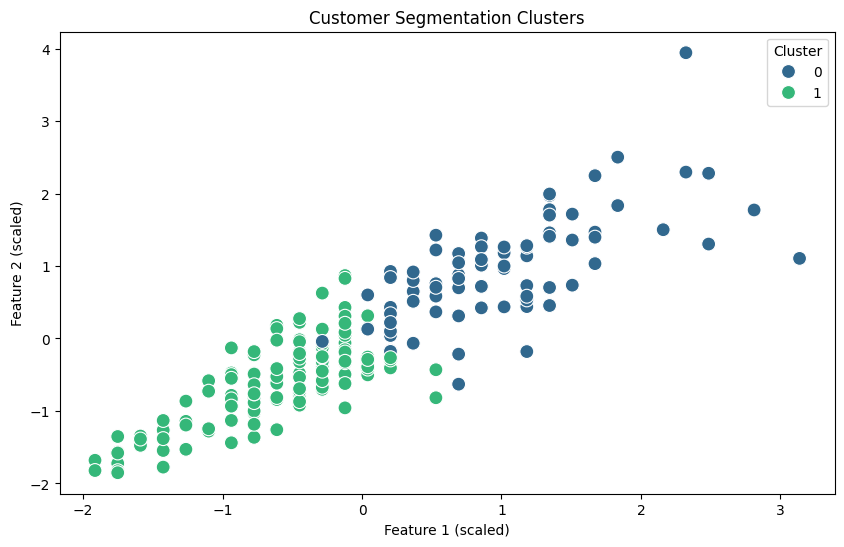

In [17]:
# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1],
    hue=merged_data['Cluster'], palette='viridis', s=100
)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(title="Cluster", loc="best")
plt.show()

In [18]:
# Save clustering results
merged_data.to_csv("Customer_Segmentation.csv", index=False)
print("Customer segmentation results saved to Customer_Segmentation.csv.")

Customer segmentation results saved to Customer_Segmentation.csv.
